# Graphs for Data Visualization


## Import librairies

In [5]:
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.optimize import curve_fit 


## Create folder to save figures

In [6]:
def createFolder(folder_path):
    folder_path = Path(folder_path)
    folder_path.mkdir(parents=True, exist_ok=True)

fig_folder = Path('output figures')
createFolder(fig_folder)

## Load dataset

In [13]:
# Combine xlsx of experiments in one csv
#Remove rows with missing data
def clean_dataframe(df):
    # Remove completely empty columns
    df = df.dropna(axis=1, how="all")
    # Remove rows with any NaN left
    df = df.dropna(how="any")
    return df

# Build DataFrames from two Excel files
def build_dataframes(file_path_incubate, file_path_immediate):
    """Create incubate, immediate, and control DataFrames from two files"""
    all_sheets_incubate = pd.read_excel(file_path_incubate, sheet_name=None)
    all_sheets_immediate = pd.read_excel(file_path_immediate, sheet_name=None)

    # --- Create incubate ---
    dfs_incubate = [clean_dataframe(df) for name, df in all_sheets_incubate.items() if name != "Tube 1"]
    df_incubate = pd.concat(dfs_incubate, ignore_index=True)

    # --- Create immediate ---
    dfs_immediate = [clean_dataframe(df) for name, df in all_sheets_immediate.items() if name != "Tube 1"]
    df_immediate = pd.concat(dfs_immediate, ignore_index=True)

    # --- Create control ---
    dfs_control = []
    if "Tube 1" in all_sheets_incubate:
        dfs_control.append(clean_dataframe(all_sheets_incubate["Tube 1"]))
    if "Tube 1" in all_sheets_immediate:
        dfs_control.append(clean_dataframe(all_sheets_immediate["Tube 1"]))
    df_control = pd.concat(dfs_control, ignore_index=True)

    return df_incubate, df_immediate, df_control

In [25]:
experiments_paths = {
    "Exp1": {
        "incubate": r"F:\Experiments\PTT\Spheroids\01072025_mcf7\Final_data_inc.xlsx",
        "immediate": r"F:\Experiments\PTT\Spheroids\01072025_mcf7\Final_data_imm.xlsx"
    },
    "Exp2": {
        "incubate": r"F:\Experiments\PTT\Spheroids\02062025_mcf7\04062025 after laser\Final data_inc.xlsx",
        "immediate": r"F:\Experiments\PTT\Spheroids\02062025_mcf7\04062025 after laser\Final data_imm.xlsx"
    },
    "Exp3": {
        "incubate": r"F:\Experiments\PTT\Spheroids\05052025\07052025 after laser\Final data_inc.xlsx",
        "immediate": r"F:\Experiments\PTT\Spheroids\05052025\07052025 after laser\Final data_imm.xlsx"
    },
    # Add more experiments as needed
}

In [26]:
# Collect all incubate and immediate DataFrames, add Experiment ID column

dfs_incubate = []
dfs_immediate = []

for i, (exp_name, paths) in enumerate(experiments_paths.items(), start=1):
    df_incubate, df_immediate, df_control = build_dataframes(paths["incubate"], paths["immediate"])
    # Add Experiment ID column
    df_incubate["Experiment ID"] = i
    df_immediate["Experiment ID"] = i
    # Add Label column if Normalised alb exists
    if "Normalised alb" in df_incubate.columns:
        df_incubate["Label"] = np.where(df_incubate["Normalised alb"] > 50, "Alive", "Dead")
    if "Normalised alb" in df_immediate.columns:
        df_immediate["Label"] = np.where(df_immediate["Normalised alb"] > 50, "Alive", "Dead")
    dfs_incubate.append(df_incubate)
    dfs_immediate.append(df_immediate)

# Concatenate all experiments for each condition
df_incubate_all = pd.concat(dfs_incubate, ignore_index=True)
df_immediate_all = pd.concat(dfs_immediate, ignore_index=True)

save_folder = r"F:\Experiments\PTT\Spheroids\all data\mcf7"
# Save to CSV
df_incubate_all.to_csv(f"{save_folder}\\combined_incubate.csv", index=False)
df_immediate_all.to_csv(f"{save_folder}\\combined_immediate.csv",  index=False)

In [27]:
folder_dataset_processed = Path('data/processed_data')

df_A673 = pd.read_csv(r'F:\Experiments\PTT\Spheroids\all data\mcf7\combined_incubate.csv', index_col=0)
df_PDX = pd.read_csv(r'F:\Experiments\PTT\Spheroids\all data\mcf7\combined_immediate.csv', index_col=0)

df_A673
#df_PDX

,Area,Perimeter,Circularity,Aspect_Ratio,Mean_Gray_Level,Grey_in,Grey_out,Homogeneity,Energy,Correlation,Normalised alb,Max temp (°C),Experiment ID,Label
File,,,,,,,,,,,,,,
F:\Experiments\PTT\Spheroids\01072025_mcf7\0307 after\Analysis\2025-07-03_152759_tube4_cropped_8bits\1_0605_0_8bits_BF.tiff,1957.5,174.610172,0.806812,1.078431,19.807251,83.897104,103.704356,0.914882,0.906714,0.951040,136.239941,37.0,1,Alive
F:\Experiments\PTT\Spheroids\01072025_mcf7\0307 after\Analysis\2025-07-03_152759_tube4_cropped_8bits\3_1205_0_8bits_BF.tiff,1733.5,171.438599,0.741168,0.980769,10.829578,91.327711,102.157289,0.923447,0.916781,0.944757,74.461661,37.0,1,Alive
F:\Experiments\PTT\Spheroids\01072025_mcf7\0307 after\Analysis\2025-07-03_152759_tube4_cropped_8bits\4_1504_0_8bits_BF.tiff,1489.5,163.982755,0.696072,1.162791,21.737757,89.279843,111.017600,0.932909,0.928011,0.937262,73.567866,37.0,1,Alive
F:\Experiments\PTT\Spheroids\01072025_mcf7\0307 after\Analysis\2025-07-03_152759_tube4_cropped_8bits\5_1401_0_8bits_BF.tiff,1495.5,179.781744,0.581440,1.042553,28.242010,85.929412,114.171422,0.931727,0.927116,0.917993,71.333378,37.0,1,Alive
F:\Experiments\PTT\Spheroids\01072025_mcf7\0307 after\Analysis\2025-07-03_152759_tube4_cropped_8bits\6_1101_0_8bits_BF.tiff,1379.5,151.639609,0.753887,0.956522,28.267686,82.248136,110.515822,0.937468,0.933156,0.929496,79.313693,37.0,1,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F:\Experiments\PTT\Spheroids\05052025\07052025 after laser\Analysis\2025-05-07_140511_tube3_cropped_8bits\13_0212_0_8bits_BF.tiff,479.0,91.941125,0.712075,NaN,43.962437,NaN,NaN,0.976968,0.975616,0.890813,60.035820,37.0,3,Alive
F:\Experiments\PTT\Spheroids\05052025\07052025 after laser\Analysis\2025-05-07_140511_tube3_cropped_8bits\14_0214_0_8bits_BF.tiff,795.0,119.254833,0.702466,NaN,55.515932,NaN,NaN,0.964086,0.960225,0.865488,60.162541,37.0,3,Alive
F:\Experiments\PTT\Spheroids\05052025\07052025 after laser\Analysis\2025-05-07_140511_tube3_cropped_8bits\17_0424_0_8bits_BF.tiff,555.5,126.183766,0.438417,NaN,41.340251,NaN,NaN,0.973180,0.971186,0.902077,69.624341,37.0,3,Alive


## Define  colors palette, sizes... for graphs

In [28]:
# Graph features
fontsize_title = 10
fontsize_label = 10
fontsize_tick = 9

# Color palette for classification
palette_class = {
            'high viab.': (51/255, 117/255, 56/255) ,  # Vert
            'intermediate' : (240/255, 228/255, 66/255), # Yellow
            'low viab.': (194/255, 106/255, 119/255)   # Magenta
             }

# Color palette cell type
palette_cells = {
    'A673': (  7/255, 126/255, 151/255),     # Blue
    'PDX':  (255/255, 147/255,  38/255)      # Orange
}

palette_drug_A673 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=False, n_colors=8)
palette_drug_PDX = sns.color_palette("Oranges", as_cmap=False, n_colors=8)

"""
colors_dict = {'A673': ['#0F99B2', # bleu clair
                          '#055F72' # bleu foncé
                        ],
         'PDX': ['#FF9326', # orange clair
                 '#AC5600' # orange foncé
                ]}
"""
# Set graph theme
sns.set(font='Arial')
sns.set_theme(context='paper', style='ticks')


In [29]:
# Define kws_dict_A673 and kws_dict_PDX: dictionnaries with graph parameters perso

marker_size = 20
line_size = 1

kws_dict_A673 = {
   1:
        {
        'marker' : 's',
        'line' : 'dashdot',
        'marker_col' : (82/255, 24/255, 133/255),
        'line_col' : (82/255, 24/255, 133/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    2:
        {
        'marker' : 'o',
        'line' : '-',
        'marker_col' : (31/255, 79/255, 126/255),
        'line_col' : (1/255, 114/255, 114/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    3:
        {
        'marker' : '^',
        'line' : '--',
        'marker_col' : (131/255, 27/255, 91/255),
        'line_col' : (99/255, 20/255, 69/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    
}


kws_dict_PDX = {
   1:
        {
        'marker' : 's',
        'line' : 'dashdot',
        'marker_col' : (203/255, 60/255, 52/255),
        'line_col' : (166/255, 49/255, 43/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    2:
        {
        'marker' : 'o',
        'line' : '-',
        'marker_col' : (255/255, 128/255, 0/255),
        'line_col' : (192/255, 96/255, 0/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    3:
        {
        'marker' : '^',
        'line' : '--',
        'marker_col' : (129/255, 128/255, 71/255),
        'line_col' : (129/255, 128/255, 71/255),
        'marker_size' : marker_size,
        'line_size' : line_size
        },
    
}


## Dataset description

### Count NaN

In [30]:
# A673
nan_rows = df_A673.isna().any(axis=1)
print('For A673: \nTotal rows with Nan:', nan_rows.sum())
print('Proportion of rows with Nan:', round(nan_rows.sum()/len(df_A673)*100), '%')

# Count only for data at day 2

mask_experiment_2901 = df_A673['Experiment ID'] == 1 # Create a mask for rows where 'Experiment ID' is 2901
cols_to_check = [col for col in df_A673.columns if not col.endswith('day 1')] # Select columns that do not end with 'day 1'

nan_rows = df_A673.loc[~mask_experiment_2901, cols_to_check].isna().any(axis=1) # Apply the mask: check for NaN values, but exclude 'day 1' columns for rows where 'Experiment ID' is 2901
print("\nDon't take into account data day 1 for experiment 2901 (missing data)")
print('Total rows with NaN:', nan_rows.sum())
print('Proportion of rows with NaN:', round(nan_rows.sum() / len(df_A673) * 100, 2), '%')

# PDX
nan_rows = df_PDX.isna().any(axis=1)
print('\n\nFor PDX: \nTotal rows with Nan:', nan_rows.sum())
print('Proportion of rows with Nan:', round(nan_rows.sum()/len(df_PDX)*100), '%')

For A673: 
Total rows with Nan: 79
Proportion of rows with Nan: 40 %

Don't take into account data day 1 for experiment 2901 (missing data)
Total rows with NaN: 79
Proportion of rows with NaN: 39.9 %


For PDX: 
Total rows with Nan: 60
Proportion of rows with Nan: 32 %


### Description classes

In [31]:
feat_A673 = [
   
   'Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Grey_in',
   'Grey_out',
   'Homogeneity',
   'Energy',
   'Correlation'
]

feat_PDX = [

   'Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Grey_in',
   'Grey_out',
   'Homogeneity',
   'Energy',
   'Correlation'
]

# ...existing code...
df_A673_copy = df_A673.copy()
df_PDX_copy = df_PDX.copy()

df_A673_copy = df_A673_copy.dropna(subset=feat_A673).reset_index(drop=True)
df_PDX_copy = df_PDX_copy.dropna(subset=feat_PDX).reset_index(drop=True)

# Add '2 classes' and '3 classes' columns based on 'viability score'
df_A673_copy['2 classes'] = np.where(df_A673_copy['Normalised alb'] > 50, 'high viab.', 'low viab.')
df_PDX_copy['2 classes'] = np.where(df_PDX_copy['Normalised alb'] > 50, 'high viab.', 'low viab.')

df_A673_copy['3 classes'] = pd.cut(df_A673_copy['Normalised alb'], bins=[-np.inf, 33, 66, np.inf], labels=['low viab.', 'intermediate', 'high viab.'])
df_PDX_copy['3 classes'] = pd.cut(df_PDX_copy['Normalised alb'], bins=[-np.inf, 33, 66, np.inf], labels=['low viab.', 'intermediate', 'high viab.'])

print(df_A673_copy)

       Area   Perimeter  Circularity  Aspect_Ratio  Mean_Gray_Level  \
0    1957.5  174.610172     0.806812      1.078431        19.807251   
1    1733.5  171.438599     0.741168      0.980769        10.829578   
2    1489.5  163.982755     0.696072      1.162791        21.737757   
3    1495.5  179.781744     0.581440      1.042553        28.242010   
4    1379.5  151.639609     0.753887      0.956522        28.267686   
..      ...         ...          ...           ...              ...   
114  1536.0  171.882250     0.653340      1.222222        67.270629   
115  1202.0  155.396968     0.625503      1.000000        51.195614   
116  1257.5  159.781744     0.618961      0.796296        54.482897   
117  1364.0  166.568542     0.617786      0.846154        39.108858   
118  1401.5  171.296463     0.600214      0.777778        66.033653   

       Grey_in    Grey_out  Homogeneity    Energy  Correlation  \
0    83.897104  103.704356     0.914882  0.906714     0.951040   
1    91.327711 

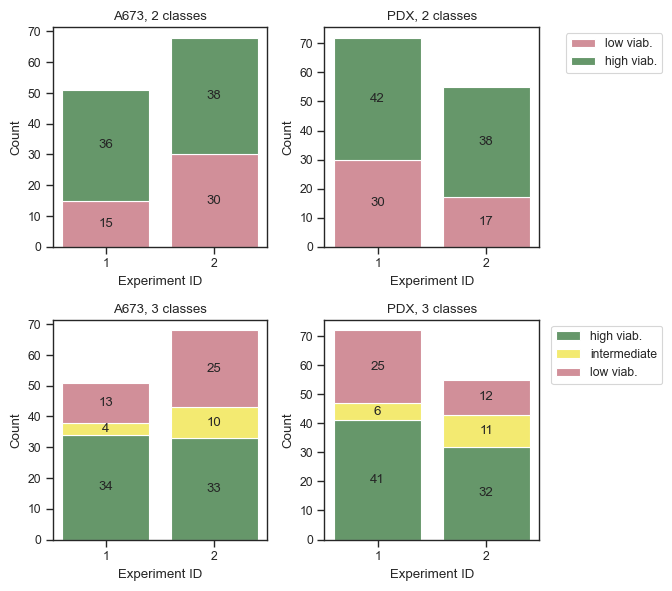

In [32]:
x = 'Experiment ID'
h2 = '2 classes'
h3 = '3 classes'

# Transform Experiment ID into string values
df_A673_copy[x] = df_A673_copy[x].astype('str')
df_PDX_copy[x] = df_PDX_copy[x].astype('str')

# Initialize figure
fig, axes = plt.subplots(2, 2, figsize=(7, 6))
axes = axes.flatten()


### Plot histograms
# A673, 2 classes
sns.histplot(data=df_A673_copy, x=x, hue=h2, multiple='stack', palette=palette_class, shrink=.8, ax=axes[0], legend=False)

# PDX, 2 classes
sns.histplot(data=df_PDX_copy, x=x, hue=h2, multiple='stack', palette=palette_class, shrink=.8, ax=axes[1])

# A673, 2 classes
sns.histplot(data=df_A673_copy, x=x, hue=h3, multiple='stack', palette=palette_class, shrink=.8, ax=axes[2], legend=False)

# PDX, 3 classes
sns.histplot(data=df_PDX_copy, x=x, hue=h3, multiple='stack', palette=palette_class, shrink=.8, ax=axes[3])


### Add numbers corresponding to each bar
def number(axes):
    for p in axes.patches:
    # Coordinates of each bar
        height = p.get_height()
        width = p.get_width()
        x_pos = p.get_x() + width / 2 
        y_pos = p.get_y() + height / 2
        offset = 0.05 
    
        # If bars greater than 0, displays the number of elements corresponding to the bar
        if height > 0:
            axes.text(x_pos, y_pos + offset, f'{int(height)}', ha='center', va='center')

for i in range(4):
    number(axes[i])

### Add titles
axes[0].set_title('A673, 2 classes')
axes[1].set_title('PDX, 2 classes')
axes[2].set_title('A673, 3 classes')
axes[3].set_title('PDX, 3 classes')

# Change labels legend
axes[1].legend(['low viab.', 'high viab.'])
axes[3].legend(['high viab.', 'intermediate', 'low viab.'])

sns.move_legend(axes[1], "upper right", bbox_to_anchor=(1.6, 1))
sns.move_legend(axes[3], "upper right", bbox_to_anchor=(1.6, 1))

plt.tight_layout()
plt.savefig(fig_folder / "S9_dataset_description.svg", format='svg', bbox_inches='tight', transparent=False)
plt.show()

In [33]:
df_A673_copy.groupby('Experiment ID')['3 classes'].value_counts()

Experiment ID  3 classes   
1              high viab.      34
               low viab.       13
               intermediate     4
2              high viab.      33
               low viab.       25
               intermediate    10
Name: count, dtype: int64

## Save .csv for each feature for GraphPrism plot

In [34]:
def featureToCsvPrism(df, x, y, replace0=(True, 0.001)):
    # x vector sorted and without repetition
    x_values = sorted(df[x].unique())

    # Determine the maximum number of replicates per x_value
    n_replicats = df[x].value_counts().max()

    # Create a new DataFrame with replicates as rows and x values as columns
    new_df = pd.DataFrame(index=list(range(1, n_replicats + 1)), columns=x_values)

    # Populate the new DataFrame with values from `y`
    for x_value in x_values:
        # Take the values of the columns y where column x is equal to x_value, reset index
        filtered_values = df.loc[df[x] == x_value, y].reset_index(drop=True)

        # Add theses values to a new dataframe, 1 column corresponds to the same x_value
        new_df[x_value] = filtered_values.reindex(range(len(new_df)), fill_value=None).values

        # Rename the column with `0` (optional)
        if replace0[0] == True and 0 in new_df.columns:
            new_df.rename(columns={0: replace0[1]}, inplace=True)

        new_df_t = new_df.transpose()

    return new_df_t



def savefeatureToCsvPrism(df, x, cols, folder_name):
    # Create output folder
    folder_csv_features = Path(fig_folder) / folder_name
    createFolder(folder_csv_features)

    # Get unique experiment IDs
    exps = df['Experiment ID'].unique()

    for y in cols:
        # Save data of each experiment independently
        for exp in exps:
            # Filter data for each experiment
            df_filtered = df[df['Experiment ID'] == exp]
            # Format data
            df_prism = featureToCsvPrism(df_filtered, x, y)
            # Save to CSV
            name = f"{y} exp {exp}.csv"
            path = folder_csv_features / name
            df_prism.to_csv(path)
        
        # Save combined data across all experiments
        df_prism = featureToCsvPrism(df, x, y)
        name = f"{y} all.csv"
        path = folder_csv_features / name
        df_prism.to_csv(path)


### Save .csv files for each feature

In [35]:
### Save features .csv independently
x = 'Max temp (°C)'
cols = df_A673.columns[4:-5]
print(cols)

# For A673
df = df_A673.copy()
folder_name = 'csv features A673'
savefeatureToCsvPrism(df, x, cols, folder_name)

# For PDX
df = df_PDX.copy()
folder_name = 'csv features PDX'
savefeatureToCsvPrism(df, x, cols, folder_name)

print(".csv files have been saved !")

Index(['Mean_Gray_Level', 'Grey_in', 'Grey_out', 'Homogeneity', 'Energy'], dtype='object')
.csv files have been saved !


### Save .csv files for viability score

In [36]:
### Save metabolic activity independently
x = 'Max temp (°C)'
cols = ['Normalised alb']

df = df_A673.copy()
folder_name = 'csv viability score A673'
savefeatureToCsvPrism(df, x, cols, folder_name)

df = df_PDX.copy()
folder_name = 'csv viability score PDX'
savefeatureToCsvPrism(df, x, cols, folder_name)

print(".csv files have been saved !")


.csv files have been saved !


## Description of data

### Plot feature evolution VS day

In [37]:
def featureVSday(fig, ax, df, feature,  legend_display=True, palette='rocket'):
    # Define the x-axis (drug exposure times) and the column name for drug concentration
    x = [0, 1, 2]
    z = 'Max temp (°C)'

    # Create a color palette based on the number of unique drug concentrations in the dataset
    unique_concentrations = np.sort(df[z].unique())                     # Get unique drug concentrations and sort them
    palette = sns.color_palette(palette, len(unique_concentrations))    # Generate the color palette

    drug_colors = dict(zip(unique_concentrations, palette))       # Map each concentration to a color (from lighter to darker)

    # Loop through each row of the dataframe to plot the data
    for _, row in df.iterrows():
        # Extract the feature values for each time point
        y_values = [row[f"{feature}_day0"], row[f"{feature}_day1"], row[f"{feature}_day2"]]

        # Assign color based on the drug concentration value
        color = drug_colors[row[z]]

        # Plot a line with markers at each time point
        ax.plot(x, y_values, marker='o', color=color, label=row[z], 
               # lw=1, ms=3
                )
        
        # Set the axis labels and personalize the graph's appearance
        ax.set_xlabel('drug exposure time (h)')
        ax.set_ylabel(feature)
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(['0', '24', '48'])
        ax.grid(True)
    
    # If the legend is to be displayed, adjust the legend's properties
    if legend_display:
        # Get the handles and labels of the legend (the plot line and its label)
        handles, labels = ax.get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
        
        # Sort the legend items based on the numeric value of the drug concentration
        sorted_labels_handles = sorted(unique_labels.items(), key=lambda x: float(x[0]))
        
        # Extract the sorted labels and handles
        sorted_labels = [label for label, handle in sorted_labels_handles] 
        sorted_handles = [handle for label, handle in sorted_labels_handles]

        # Create the legend outside the graph with sorted items
        fig.legend(sorted_handles, sorted_labels, 
                   title="Drug concentration (µM)", 
                   loc='upper center', bbox_to_anchor=(0.5, 0),
                   ncol=8)
    
    


KeyError: 'Area (um2)_day0'

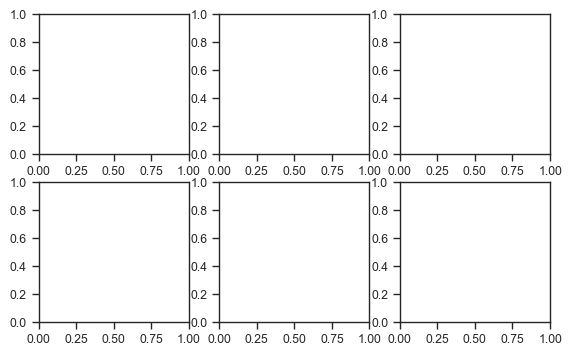

In [38]:
features = ['Area (um2)',
            'Mean grey value',
            'Circularity',
            'Correlation',
            'Homogeneity',
            'Energy',
           # 'Solidity',
           # 'Equivalent Diameter (um)',
            #'Perimeter (um)'
            ]

df = df_A673.copy()
fig, axes = plt.subplots(2, 3, figsize=(6.6, 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    featureVSday(fig, axes[i], df, feature, legend_display=True, palette=palette_drug_A673)

# Hide x labels for the first line
for ax in axes[:3]:
    ax.set_xlabel('') 

plt.tight_layout()
plt.savefig(fig_folder / "S2 feature VS time A673.svg", format='svg', bbox_inches='tight', transparent=False)
plt.show()

KeyError: 'Area (um2)_day0'

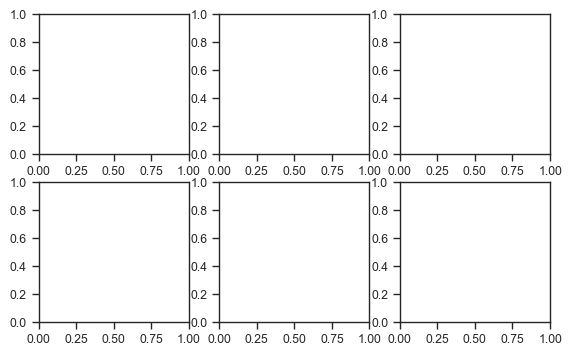

In [39]:
df = df_PDX.copy()
fig, axes = plt.subplots(2, 3, figsize=(6.6, 4))
axes = axes.flatten()


for i, feature in enumerate(features):
    featureVSday(fig, axes[i], df, feature, legend_display=True, palette=palette_drug_PDX)


# Hide x labels for the first line
for ax in axes[:3]:
    ax.set_xlabel('') 

plt.tight_layout()
plt.savefig(fig_folder / "S2 feature VS time PDX.svg", format='svg', bbox_inches='tight', transparent=False)
plt.show()

### Plot Metabolic activity VS drug

In [40]:
# Define sigmoide equation for the fitting
def sigmoid_normalized(x, IC50, slope):
    return  100 / ( 1 + (IC50 / x) ** slope)

def plot_IC50(fig, ax, df, x, y, title="", sigmoidFit=True, marker='o', marker_col='b', line='-', line_col='b', marker_size=10, line_size=2):
    # For the log representation and fit, change the concentration '0' into a low concentration
    df.loc[:, x] = df[x].replace(0, 0.01)

    ### Plot the data as a scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=ax,
                    s=marker_size, marker=marker, color=marker_col,  alpha=0.5, legend=False) 

    ### Sigmoid fit
    if sigmoidFit == True:
        X = df[x]
        Y = df[y]

        # For the log representation and fit, change the concentration '0' into a low concentration
        X = X.replace(0, 0.01) 

        # Fit a sigmoid on the data
        ini_param = [np.median(X), -1]
        popt, pcov = curve_fit(sigmoid_normalized, X, Y, p0=ini_param)
        IC50, slope = popt

        # Create points for the fitted curve & plot
        x_fit = np.linspace(min(X), max(X), 10000)
        y_fit = sigmoid_normalized(x_fit, *popt)
        
        # Plot curve
        sns.lineplot(x=x_fit, y=y_fit, 
                            linestyle=line, color=line_col, linewidth=line_size, ax=ax)

        
    ### Graph personalization
    # Define axes limits
    
    axes[0].set_xlim(30, 90)
    axes[1].set_xlim(30, 90)

    # Change graduation
    x_ticks = [0,10,20,30,40,50,60,70,80,90]
    x_labels = ['0'] + [str(l) for l in x_ticks[1::]]
    ax.set_xticks(x_ticks, labels=x_labels)

    ax.set_title(title)

    # Set x & y axis names
    ax.set_xlabel(x)
    ax.set_ylabel(y)        
        
    ax.grid(True)
    
    return IC50, slope, popt, pcov




A673:
IC50 exp 1 = 52.53961607579995 µM
IC50 exp 2 = 49.33955521656233 µM


ValueError: cannot reindex on an axis with duplicate labels

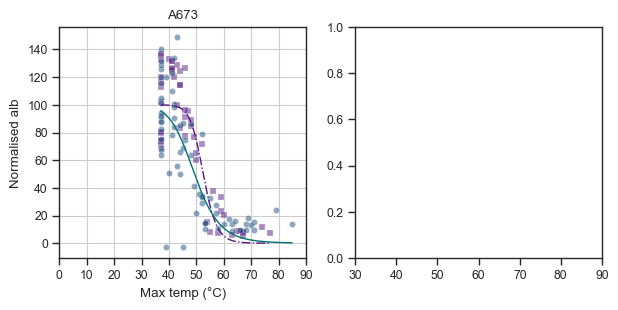

In [41]:
x = 'Max temp (°C)'
y = 'Normalised alb'

# Initialize the figure, 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(7,3))
axes = axes.flatten()

print("A673:")
df = df_A673.copy()
exps = df['Experiment ID'].unique()

for exp in exps:
    df_filt = df[df['Experiment ID'] == exp]
    kws_dict = kws_dict_A673[exp]
    marker = kws_dict['marker']
    line = kws_dict['line']
    marker_col = kws_dict['marker_col']
    line_col = kws_dict['line_col']
    marker_size = kws_dict['marker_size']
    line_size = kws_dict['line_size']

    IC50, _, _, _ = plot_IC50(fig, axes[0], df_filt, x, y, title="A673", sigmoidFit=True, marker=marker, marker_col=marker_col, line=line, line_col=line_col, marker_size=marker_size, line_size=line_size)
    print(f"IC50 exp {exp} = {IC50} µM")

print("\nPDX:")
df = df_PDX.copy()
exps = df['Experiment ID'].unique()

for exp in exps:
    df_filt = df[df['Experiment ID'] == exp]
    kws_dict = kws_dict_PDX[exp]
    marker = kws_dict['marker']
    line = kws_dict['line']
    marker_col = kws_dict['marker_col']
    line_col = kws_dict['line_col']
    marker_size = kws_dict['marker_size']
    line_size = kws_dict['line_size']

    IC50, _, _, _ = plot_IC50(fig, axes[1], df_filt, x, y, title="PDX", sigmoidFit=True, marker=marker, marker_col=marker_col, line=line, line_col=line_col, marker_size=marker_size, line_size=line_size)
    print(f"IC50 exp {exp} = {IC50} µM")
plt.tight_layout()
# Set x-axis limits for both subplots
axes[0].set_xlim(30, 90)
axes[1].set_xlim(30, 90)
plt.show()


### Plot the features VS drug

In [42]:
def sigmoid(x, B, T, IC50, slope):
    return B + (T - B) / (1 + (IC50 / x) ** slope)

In [43]:
def featureVSdrug(df, x, y, ax, limits_y, kws_dict, fit=True, grad=True):
    # Replace concentration 0 for log plot
    df.loc[:, x] = df[x].replace(0, 0.01)

    # Parameters for personalization
    marker = kws_dict['marker']
    line = kws_dict['line']
    marker_col = kws_dict['marker_col']
    line_col = kws_dict['line_col']
    marker_size = kws_dict['marker_size']
    line_size = kws_dict['line_size']

    ### Plot data
    sns.scatterplot(data=df, x=x, y=y, ax=ax,
                    s=marker_size, marker=marker, color=marker_col,  alpha=0.5, legend=False)     
        
    
    ### Sigmoid fit
    if fit == True:
        # Fit the features
        B, T, IC50, slope, pcov = 0,0,0,0,0
        df_filt = df[[x, y]].dropna(subset=[y])
        
        if len(df_filt) != 0:
            X = df_filt[x]
            Y = df_filt[y]
            
            try:
                ini_param = [min(Y), max(Y), np.median(X), 1]
                popt, pcov = curve_fit(sigmoid, X, Y, p0=ini_param)
                B, T, IC50, slope = popt

                # Create points for the fitted curve
                x_fit = np.linspace(min(X), max(X), 10000)
                y_fit = sigmoid(x_fit, *popt)
            
                # Plot
                sns.lineplot(x=x_fit, y=y_fit, 
                            linestyle=line, color=line_col, linewidth=line_size, ax=ax)
                
            except RuntimeError as e:
                pass
        
       
    ### Axes formatting
    
    ax.set_xlim(0.007,110)
    ax.set_xticks([0.01,0.1,1,10,100])
    ax.set_xlabel('Max temp (°C)')
    ax.set_xticklabels(['0', '0.1', '1', '10','100'])
    ax.grid(True)
    
    ax.set_ylabel(y.split('_')[0])
    
    limits_y_key = next((key for key in limits_y if y.startswith(key)), None)
    value = limits_y.get(limits_y_key, None)
    
    if limits_y_key != None:
        ax.set_ylim(value)
    
    if grad == False :
        ax.set_yticklabels([])
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_xlabel('')

##### Determine y lim
Same ylim for the same features.

In [44]:
feats = ['Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Grey_in',
   'Grey_out',
   'Homogeneity',
   'Energy',
   'Correlation'
        ]

In [45]:
limits_y = {}

for feat in feats:
    if feat != 'Growth' and  feat != 'Grey' and feat != 'DCorrelation_' :
        cols = [f'{feat}_day0', f'{feat}_day1', f'{feat}_day2']
    else:
        cols = [f'{feat}2-0', f'{feat}2-1', f'{feat}1-0']
        
    
    data_A673 = df_A673[cols].values
    data_PDX = df_PDX[cols].values
    data = np.concatenate([data_A673, data_PDX], axis=0)

    # Compute minimal and maximal values
    y_min = np.nanmin(data)
    y_max = np.nanmax(data)

    # Add a 10% marge around the extreme values
    marge = 0.05 * (y_max - y_min)
    y_min -= marge
    y_max += marge
    y_min = round(y_min,2)
    y_max = round(y_max,2)

    # Save the limits of each feature in a dictionnary
    limits_y[feat] = (y_min,  y_max)

limits_y

KeyError: "None of [Index(['Area_day0', 'Area_day1', 'Area_day2'], dtype='object')] are in the [columns]"

#### Plot & save figures

ValueError: cannot reindex on an axis with duplicate labels

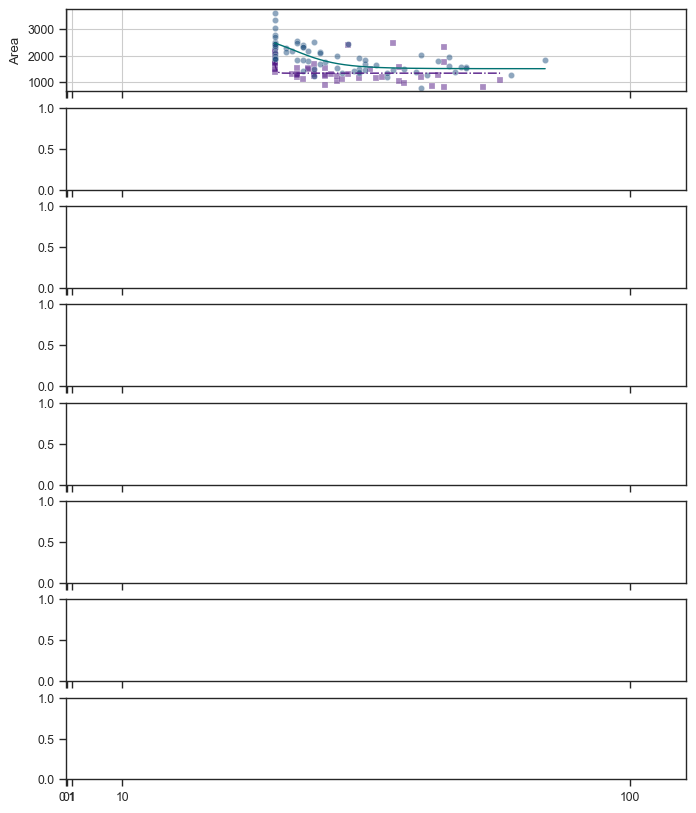

In [46]:
y_list = [ 
    'Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Homogeneity',
   'Energy',
   'Correlation' 
    ]

# Plot A673 data
df = df_A673.copy()
kws_dict = kws_dict_A673
exps = df['Experiment ID'].unique()

# Initiaze figure
fig, axes = plt.subplots(8, 1, figsize = (8, 10), sharey = 'row', sharex=True)
axes = axes.flatten()

# Plot feature vs drug for each feature
for i, y in enumerate(y_list):
    for exp in exps:
        kws_dict_exp = kws_dict[exp]
        df_filt = df[df['Experiment ID'] == exp]
        featureVSdrug(df_filt, x, y, axes[i], limits_y, kws_dict_exp, fit=True, grad=True)

plt.subplots_adjust(hspace=0, wspace=0.02)
axes[0].set_xlim(30, 90)
plt.show()

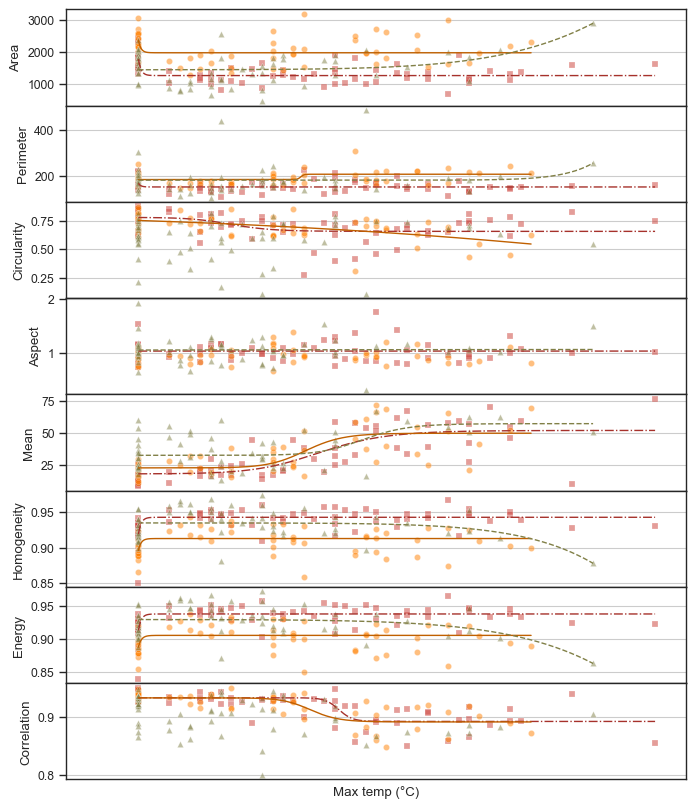

In [47]:
# Plot PDX data
df = df_PDX.copy()
kws_dict = kws_dict_PDX
exps = df['Experiment ID'].unique()

fig, axes = plt.subplots(8, 1, figsize = (8, 10), sharey = 'row', sharex=True)
axes = axes.flatten()


for i, y in enumerate(y_list):
    for exp in exps:
        kws_dict_exp = kws_dict[exp]
        df_filt = df[df['Experiment ID'] == exp]
        featureVSdrug(df_filt, x, y, axes[i], limits_y, kws_dict_exp, fit=True, grad=True)

plt.subplots_adjust(hspace=0, wspace=0.02)
axes[1].set_xlim(30, 90)
plt.show()

### Histogram feature VS class

In [48]:
df_A673.columns

Index(['Area', 'Perimeter', 'Circularity', 'Aspect_Ratio', 'Mean_Gray_Level',
       'Grey_in', 'Grey_out', 'Homogeneity', 'Energy', 'Correlation',
       'Normalised alb', 'Max temp (°C)', 'Experiment ID', 'Label'],
      dtype='object')

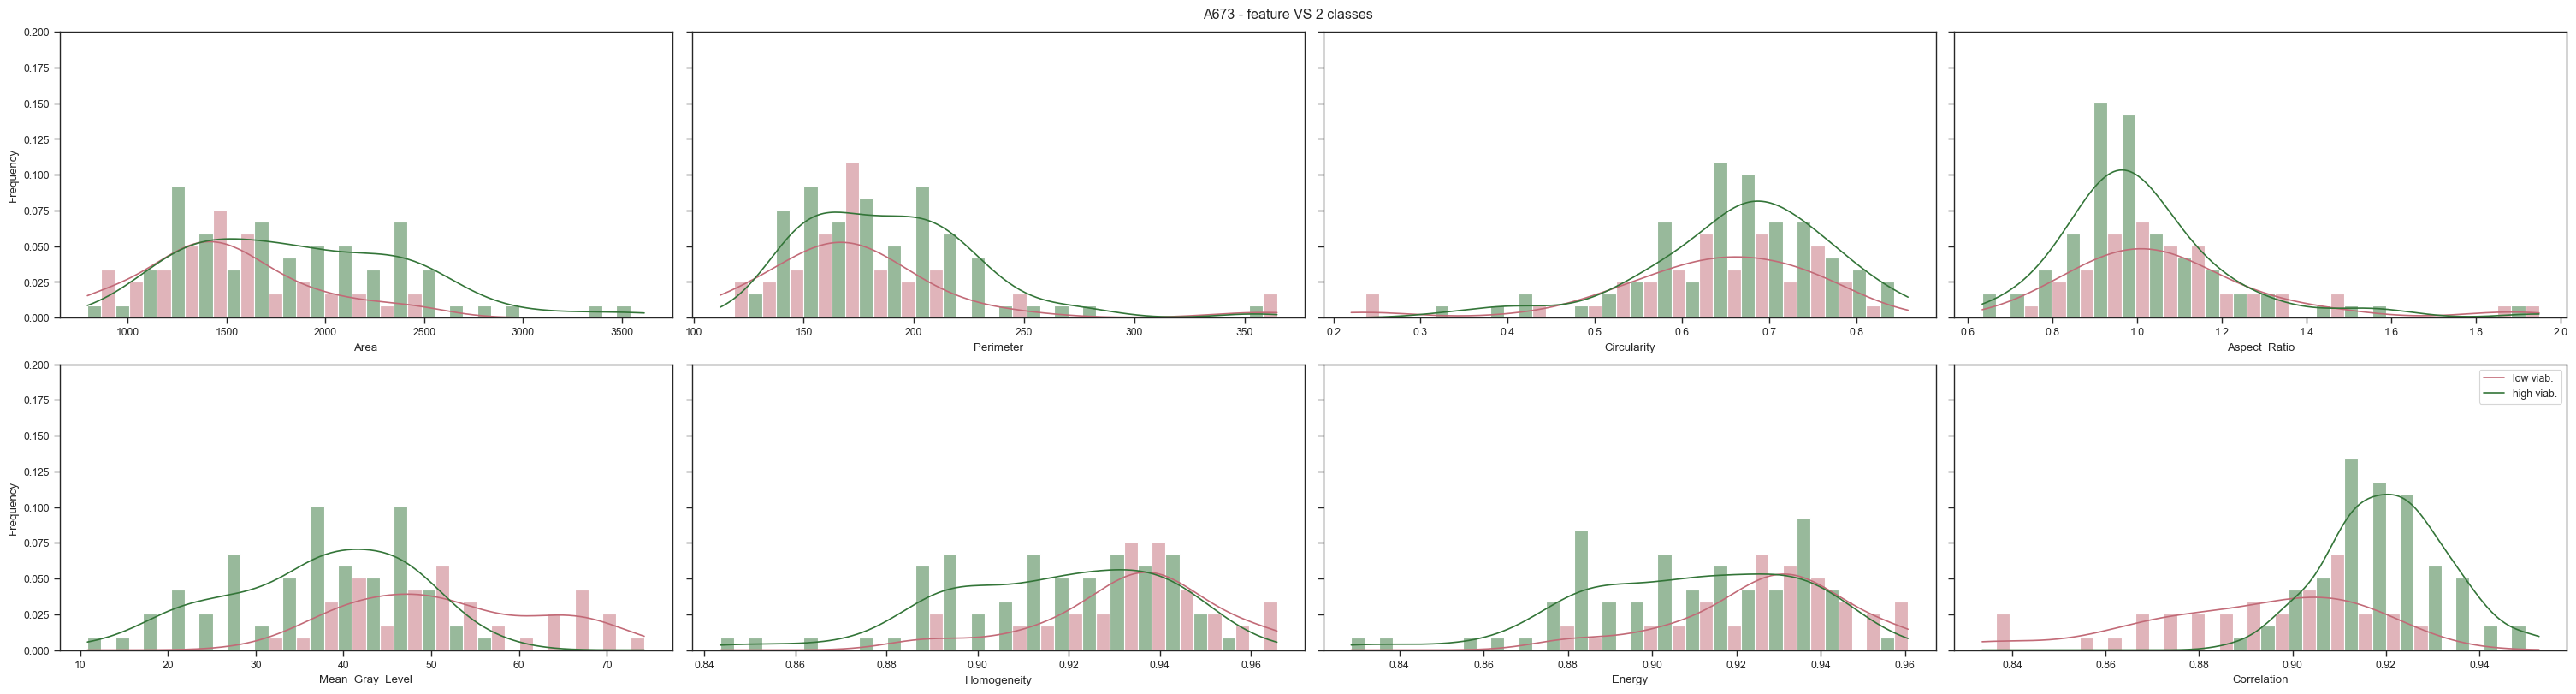

In [49]:
df = df_A673_copy.copy()
n_class = 2

#cols = [i for i in features if i.endswith('day2')]
cols = [
    'Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Homogeneity',
   'Energy',
   'Correlation' 
            ]


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 8), constrained_layout=True, sharey=True)
axes = axes.flatten()

fig.suptitle(f'A673 - feature VS {n_class} classes')


labels = df[f'{n_class} classes'].unique()

for idx, col in enumerate(cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, hue=f'{n_class} classes', palette=palette_class, multiple='dodge', legend=False,
                     shrink=1, ax=axes[idx], bins=20, stat='probability', kde=True
                     )
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

axes[-1].legend(['low viab.', 'high viab.'])
axes[0].set_ylim(0, 0.2)

plt.savefig(fig_folder / "4A histogram feature vs class A673.svg", format='svg', bbox_inches='tight', transparent=True)

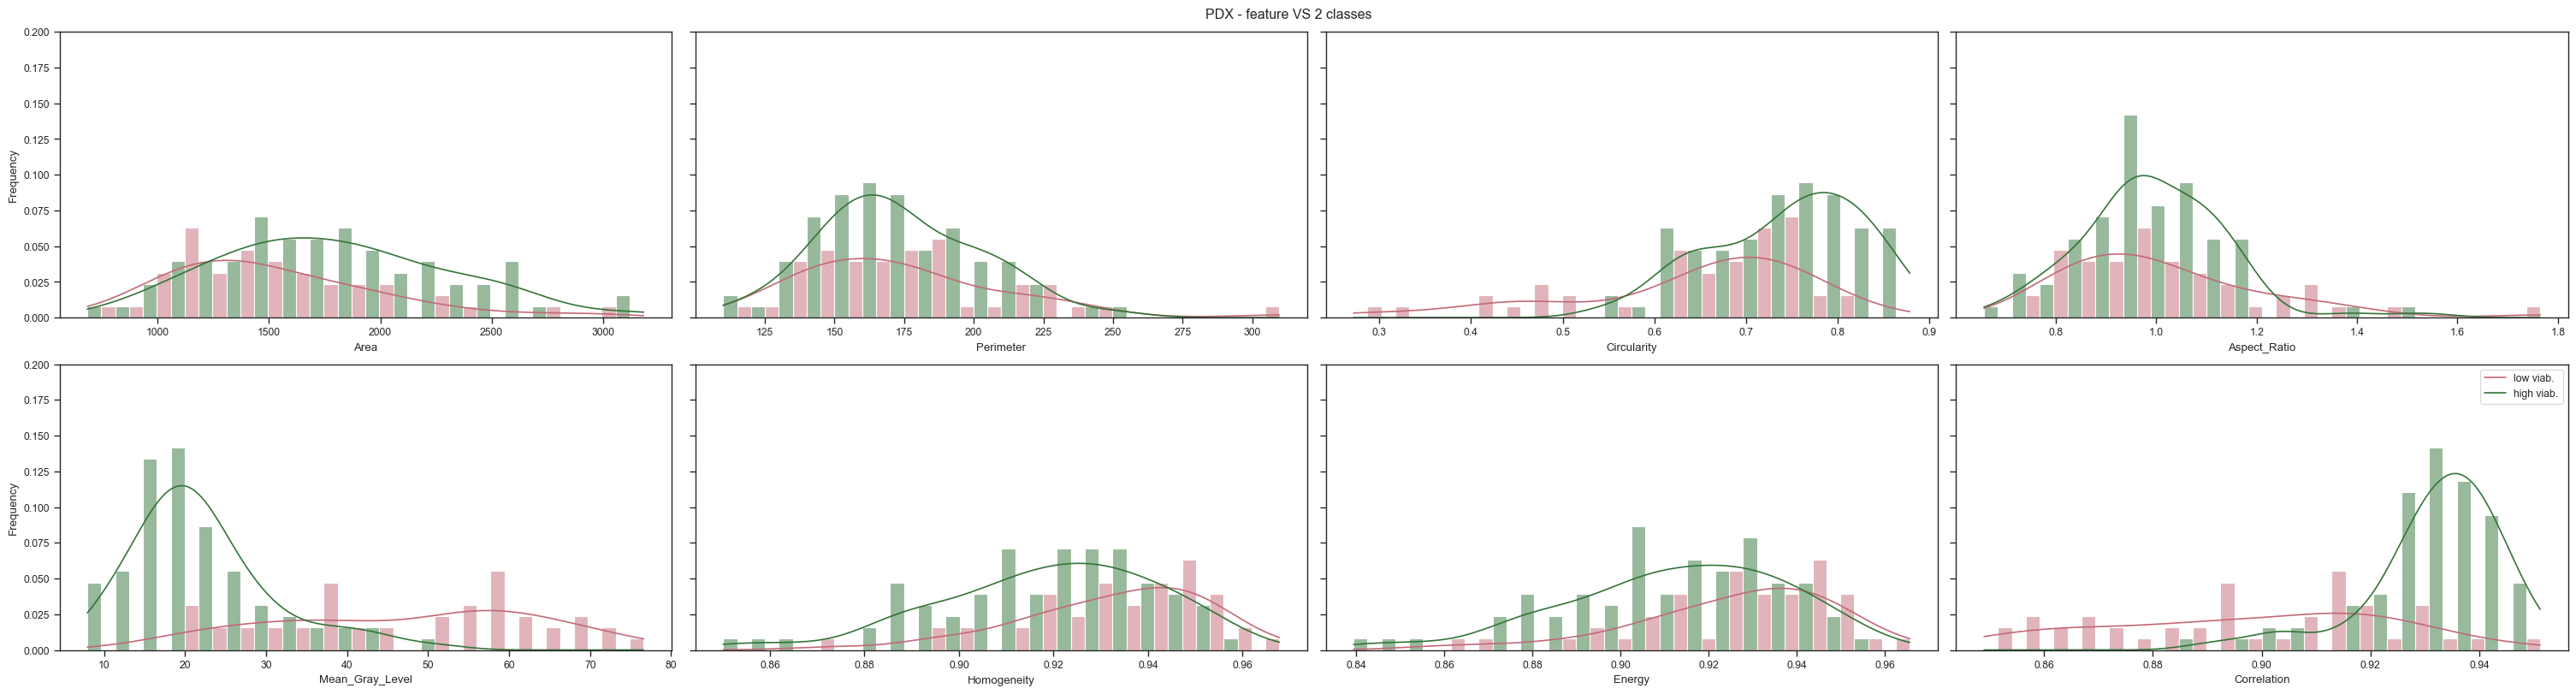

In [50]:
X_2classes = df_PDX_copy['2 classes']
df = df_PDX_copy.copy()

#cols = [i for i in features if i.endswith('day2')]
cols = ['Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Homogeneity',
   'Energy',
   'Correlation' ]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 8), constrained_layout=True, sharey=True)
axes = axes.flatten()
fig.suptitle('PDX - feature VS 2 classes')

labels = df_A673_copy['2 classes'].unique()

for idx, col in enumerate(cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, hue='2 classes', palette=palette_class, multiple='dodge', legend=False,
                     shrink=1, ax=axes[idx], bins=20, stat='probability', kde=True
                     )
        
        
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

axes[-1].legend(['low viab.', 'high viab.'])
axes[0].set_ylim(0, 0.2)

plt.savefig(fig_folder / "4C histogram feature vs class PDX.svg", format='svg', bbox_inches='tight', transparent=True)

## Other representations

### Grey level VS viability vs drug

C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\1045062276.py:19: UserWarning: 
The palette list has fewer values (8) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_A673, ax=axes[i], legend=False)
C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\1045062276.py:19: UserWarning: 
The palette list has fewer values (8) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_A673, ax=axes[i], legend=False)
C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\1045062276.py:19: UserWarning: 
The palette list has fewer values (8) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_A673, ax=axes[i], legend=False)
C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\1045062

ValueError: cannot reindex on an axis with duplicate labels

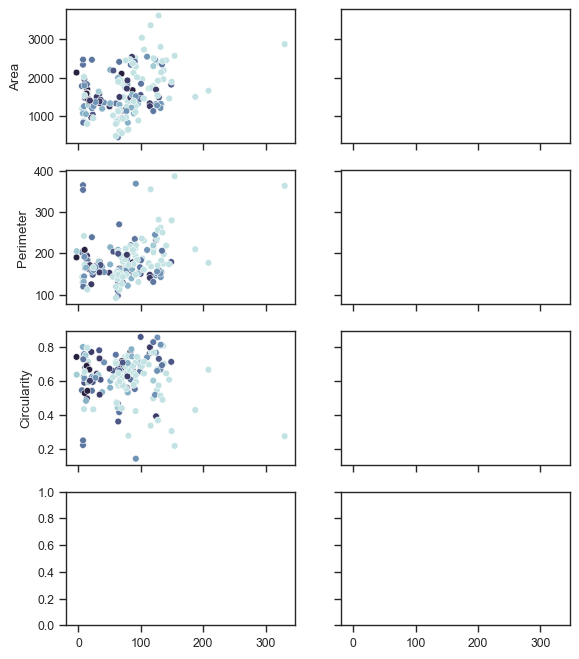

In [51]:
x = 'Normalised alb'
y = ['Area',
   'Perimeter',
   'Circularity',
   'Aspect_Ratio',
   'Mean_Gray_Level',
   'Homogeneity',
   'Energy',
   'Correlation']
hue = 'Max temp (°C)'

fig, axes = plt.subplots(4, 2, figsize=(6.5, 8), sharex=True, sharey='row')
axes = axes.flatten()

df = df_A673.copy()
df[hue] = pd.Categorical(df[hue], ordered=True)
for i in range(8):
    if i%2==0:
        sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_A673, ax=axes[i], legend=False)

df = df_PDX.copy()
df[hue] = pd.Categorical(df[hue], ordered=True)
for i in range(8):
    if i%2!=0:
        sns.scatterplot(data=df, x=x, y=y[int(i/2)], hue=hue, palette=palette_drug_PDX, ax=axes[i], legend=False)

plt.tight_layout()
plt.savefig(fig_folder / "S8 features VS viability vs drug.svg", format='svg', bbox_inches='tight', transparent=True)


C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\1899449835.py:3: UserWarning: 
The palette list has fewer values (8) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x=x, hue=hue, palette=palette_drug_A673, ax=axes, legend=True)
C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\1899449835.py:10: UserWarning: 
The palette list has fewer values (8) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x=x, hue=hue, palette=palette_drug_PDX, ax=axes, legend=True)


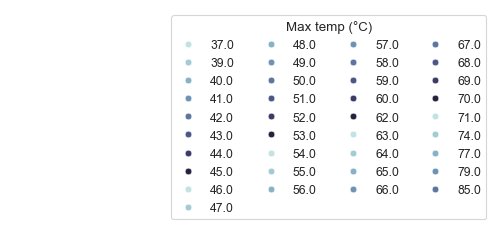

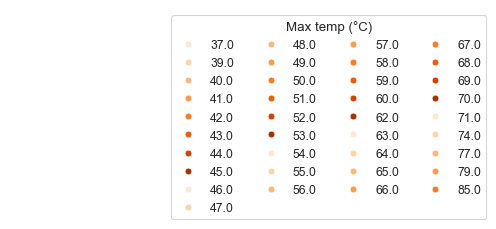

In [52]:

# Legend
fig, axes = plt.subplots(1, 1, figsize=(2,2))
sns.scatterplot(data=df, x=x, hue=hue, palette=palette_drug_A673, ax=axes, legend=True)
sns.move_legend(axes, loc='upper left', bbox_to_anchor=(1, 1), ncol=4)
axes.axis('off')
plt.savefig(fig_folder / "S8 legend1.svg", format='svg', bbox_inches='tight', transparent=True)

# Legend
fig, axes = plt.subplots(1, 1, figsize=(2,2))
sns.scatterplot(data=df, x=x, hue=hue, palette=palette_drug_PDX, ax=axes, legend=True)
sns.move_legend(axes, loc='upper left', bbox_to_anchor=(1, 1), ncol=4
                )
axes.axis('off')
plt.savefig(fig_folder / "S8 legend2.svg", format='svg', bbox_inches='tight', transparent=True)


ValueError: cannot reindex on an axis with duplicate labels

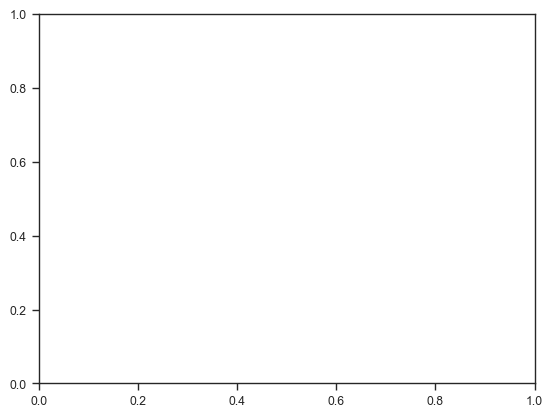

In [53]:
x = 'Max temp (°C)'
y = 'Normalised alb'
sns.scatterplot(x=x, y=y,
        hue = 'Experiment ID',
             data=df,
             markers=True)


###

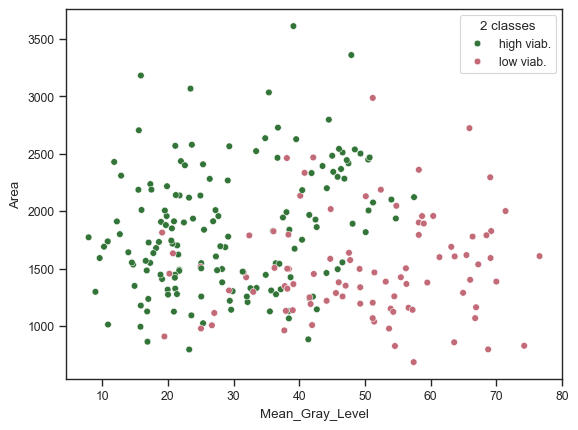

In [54]:
x = 'Mean_Gray_Level'
y = 'Area'
hue = '2 classes'

scatter = sns.scatterplot(data=df_A673_copy, x=x, y=y, hue=hue, palette=palette_class)
scatter = sns.scatterplot(data=df_PDX_copy,  x=x, y=y, hue=hue, palette=palette_class, legend=False)

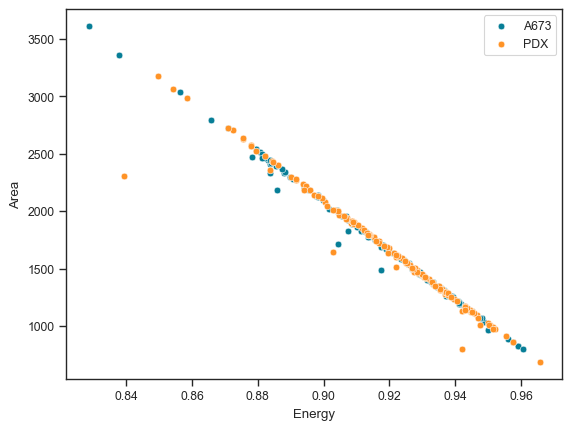

In [55]:
x = 'Energy'
y = 'Area'

scatter = sns.scatterplot(data=df_A673_copy, x=x, y=y, color=palette_cells['A673'], label='A673')
scatter = sns.scatterplot(data=df_PDX_copy, x=x, y=y, color=palette_cells['PDX'], label='PDX')

In [56]:
x = 'Normalised alb'
y = 'Area'

sns.regplot(data=df_A673[df_A673_copy['Max temp (°C)']==0], x=x, y=y, color=palette_cells['A673'], label='A673')
sns.regplot(data=df_PDX[df_PDX_copy['Max temp (°C)']==0], x=x, y=y, color=palette_cells['PDX'], label='PDX')

C:\Users\MMBM-2024-L3\AppData\Local\Temp\ipykernel_24348\3027981033.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.regplot(data=df_A673[df_A673_copy['Max temp (°C)']==0], x=x, y=y, color=palette_cells['A673'], label='A673')


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

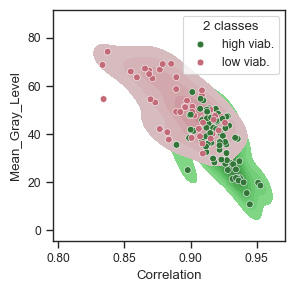

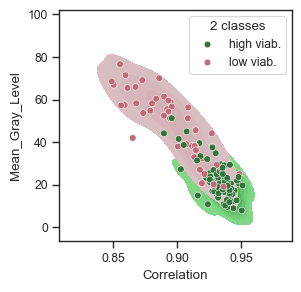

In [57]:
x = 'Correlation'
y = 'Mean_Gray_Level'
classe = '2 classes'

df = df_A673_copy.copy()

fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(data=df, x=x, y=y, hue=classe,
    fill=True, palette=palette_class)
scatter = sns.scatterplot(data=df, x=x, y=y, hue=classe, palette=palette_class)

df = df_PDX_copy.copy()

fig, ax = plt.subplots(figsize=(3, 3))
sns.kdeplot(data=df, x=x, y=y, hue=classe,
    fill=True, palette=palette_class, ax=ax
)
scatter = sns.scatterplot(data=df, x=x, y=y, hue=classe, palette=palette_class)

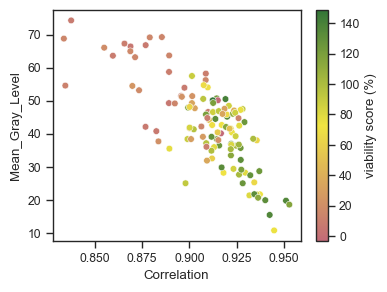

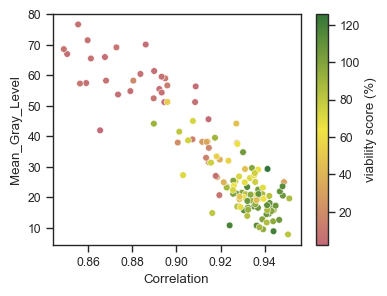

In [58]:
### Color palette
color_start = (194/255, 106/255, 119/255)  # reddish color
color_middle = (240/255, 228/255, 66/255)  # yellowish color
color_end = (51/255, 117/255, 56/255)  # greenish color

# Create a custom colormap that transitions through the three colors
continuous_cmap = LinearSegmentedColormap.from_list("custom_palette", [color_start, color_middle, color_end])


x = 'Correlation'
y = 'Mean_Gray_Level'
viab = 'Normalised alb'

df = df_A673_copy.copy()

fig, ax = plt.subplots(figsize=(4, 3))
scatter = sns.scatterplot(data=df, x=x, y=y, hue=viab, palette=continuous_cmap, legend=None, ax=ax)
# Add a color bar to indicate the continuous values
norm = plt.Normalize(df[viab].min(), df[viab].max())
sm = plt.cm.ScalarMappable(cmap=continuous_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('viability score (%)')


df = df_PDX_copy.copy()

fig, ax = plt.subplots(figsize=(4, 3))
scatter = sns.scatterplot(data=df, x=x, y=y, hue=viab, palette=continuous_cmap, legend=None, ax=ax)
# Add a color bar to indicate the continuous values
norm = plt.Normalize(df[viab].min(), df[viab].max())
sm = plt.cm.ScalarMappable(cmap=continuous_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax = ax)
cbar.set_label('viability score (%)')